<a href="https://colab.research.google.com/github/AsiaAlrashed/DL-DS-ML/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
df = pd.read_csv("advertising1.csv")
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27/03/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04/04/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13/03/2016 20:35,0


In [169]:
df.shape

(1000, 10)

In [170]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [172]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [173]:
df.duplicated().sum()

0

 * **numeric** = ["Daily Time Spent on Site","Age","Area Income","Daily Internet Usage"]

 * **category** = ["Ad Topic Line " , "City" , "Male" ,"Country", "Timestamp","Clicked on Ad  "]

In [174]:
numeric = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
Category = [ 'Ad Topic Line', 'City', 'Male', 'Country', 'Clicked on Ad']

# target -> clicked on AD

<ipython-input-175-b31461b44f93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad', data=df,palette="flare")


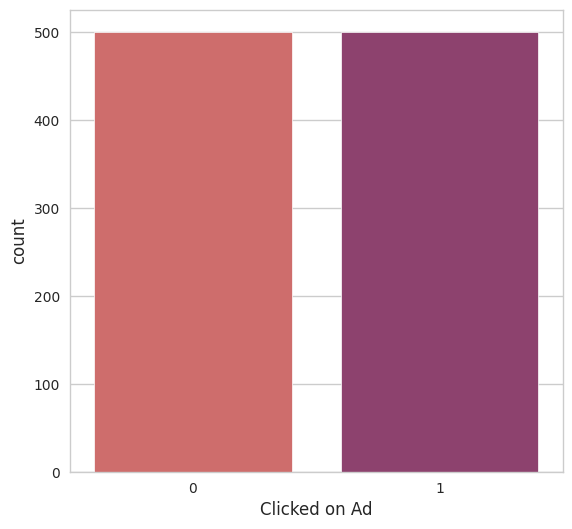

In [175]:
plt.figure(figsize=(14, 6))
plt.subplot(1,2,1)
sns.countplot(x='Clicked on Ad', data=df,palette="flare")
plt.show()

# **category**




⬇ **Country**

In [176]:
df[Category].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Cloned 5thgeneration orchestration,Lisamouth,France
freq,1,3,9


In [177]:
#country = pd.DataFrame(df['Country'].value_counts( ascending = False))
column={
    'Country' : df['Country'],
    'Clicked on Ad' : df['Clicked on Ad']
}
country = pd.DataFrame(column)
country =country.groupby(['Country','Clicked on Ad'])['Clicked on Ad'].count().unstack()
country.head(75)

Clicked on Ad,0,1
Country,,
Afghanistan,3.0,5.0
Albania,3.0,4.0
Algeria,3.0,3.0
American Samoa,2.0,3.0
Andorra,NaN,2.0
...,...,...
France,4.0,5.0
French Guiana,1.0,3.0
French Polynesia,4.0,1.0


In [178]:
coulmn = {
    'Country' : df['Country'],
}
# Create a Dataframe object
Country = pd.DataFrame(coulmn)
Country = Country.groupby(["Country"],as_index=False).value_counts()
Country = Country[Country['count'] >= 5]
Country =Country.sort_values('count',ascending=False)
Country.head(5)

,Country,count
70,France,9
54,Czech Republic,9
0,Afghanistan,8
195,South Africa,8
80,Greece,8


In [179]:
coulmn = {
    'Country' : df['Country'],
    'mean_Clicked on Ad' :df['Clicked on Ad'],
}

# Create a Dataframe object
df_country = pd.DataFrame(coulmn)
df_country = df_country.groupby(["Country"],as_index=False)[["mean_Clicked on Ad"]].mean()
df_country = df_country[df_country['mean_Clicked on Ad'] >= 0.5]
df_country =df_country.sort_values('mean_Clicked on Ad',ascending=False)
df_country.head(5)

,Country,mean_Clicked on Ad
29,British Indian Ocean Territory (Chagos Archipe...,1.0
123,Macao,1.0
176,Saint Barthelemy,1.0
178,Saint Kitts and Nevis,1.0
142,Montserrat,1.0


In [180]:
df_Country = Country.merge(df_country,left_on='Country',right_on='Country')
df_Country = df_Country.sort_values('mean_Clicked on Ad',ascending=False)
df_Country.head(5)

,Country,count,mean_Clicked on Ad
17,Liechtenstein,6,1.000000
11,Ethiopia,7,1.000000
8,Turkey,8,0.875000
9,Australia,8,0.875000
24,Hungary,6,0.833333


In [181]:
pip install pycountry_convert

In [182]:
#function to convert to alpah2 country codes and continents
import pycountry_convert
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col['Country'])
    except:

        cn_a2_code = 'Unknown'
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown'
    return cn_a2_code , cn_continent

In [183]:
df_Country['Codes'] ,df_Country['continent']= zip(*df_Country.apply(get_continent , axis=1))
df_Country.head(3)

,Country,count,mean_Clicked on Ad,Codes,continent
17,Liechtenstein,6,1.000,LI,EU
11,Ethiopia,7,1.000,ET,AF
8,Turkey,8,0.875,TR,AS


In [184]:
pip install geopy

In [193]:
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="http")
def geolocate_long(country):
    try:
        # Geolocate the center of the country

        loc = geolocator.geocode(country['Country'])
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

def geolocate_lat(country):
    try:
        # Geolocate the center of the country

        loc = geolocator.geocode(country['Country'])
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan

In [194]:
df_Country['geolocate_long']= df_Country.apply(geolocate_long, axis=1)
df_Country['geolocate_lat']= df_Country.apply(geolocate_lat, axis=1)

In [195]:
df_Country.head(10)

,Country,count,mean_Clicked on Ad,Codes,continent,geolocate_long,geolocate_lat
17,Liechtenstein,6,1.000000,LI,EU,9.553153,47.141631
11,Ethiopia,7,1.000000,ET,AF,38.652120,10.211670
8,Turkey,8,0.875000,TR,AS,34.924965,38.959759
9,Australia,8,0.875000,AU,OC,134.755000,-24.776109
24,Hungary,6,0.833333,HU,EU,19.506094,47.181759
16,Mayotte,6,0.833333,YT,AF,45.152076,-12.823048
43,Antigua and Barbuda,5,0.800000,AG,NA,-61.955461,17.223472
50,Cuba,5,0.800000,CU,NA,-80.832875,23.013134
2,South Africa,8,0.750000,ZA,AF,24.991639,-28.816624
3,Liberia,8,0.750000,LR,AF,-9.365852,5.749972


In [191]:
empty_df = df_Country[df_Country['geolocate_lat'].isnull()]
empty_df['Country'].unique()

array([], dtype=object)

🔵 The average number of people who visited the site and saw the ad in these countries was between [0.95 , 1]

🟢 The average number of people who visited the site and saw the ad in these countries was between [0.85 , 0.95]

🟡The average number of people who visited the site and saw the ad in these countries was between [0.75 , 0.85]

🔴The average number of people who visited the site and saw the ad in these countries was between [0.5 , 0.75]


In [ ]:
pip install folium

In [197]:
# Create a world map to show distributions of users
import folium
from folium.plugins import MarkerCluster
import requests
#empty map
world_map= folium.Map([df_Country.geolocate_lat.mean(), df_Country.geolocate_long.mean()],zoom_start=3,tiles="cartodb positron")

us_states = requests.get(
    "https://raw.githubusercontent.com/python-visualization/folium-example-data/main/us_states.json"
).json()

folium.Choropleth(
    geo_data=us_states,
    fill_opacity=0,
    line_weight=0,
).add_to(world_map)

#marker_cluster = MarkerCluster().add_to(world_map)
#for each coordinate, create circlemarker of user percent
for i in range(len(df_Country)):
        lat = df_Country.iloc[i]['geolocate_lat']
        long = df_Country.iloc[i]['geolocate_long']
        radius=0
        popup_text = """Country : {}<br>"""
        popup_text = popup_text.format(df_Country.iloc[i]['Country']
                                        )
        if(0.5 <= df_Country.iloc[i]['mean_Clicked on Ad']<= 0.75):
          radius = 1
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#fc3d03', fill =True).add_to(world_map)

        if (0.75 < df_Country.iloc[i]['mean_Clicked on Ad']<= 0.85):
          radius = 1.5
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#fcb603', fill =True).add_to(world_map)

        if (0.85 < df_Country.iloc[i]['mean_Clicked on Ad']<= 0.95):
          radius = 2
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#03fc30', fill =True).add_to(world_map)

        if (0.95 < df_Country.iloc[i]['mean_Clicked on Ad']<= 1):
          radius = 2.5
          folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text,color='#03a5fc', fill =True).add_to(world_map)
#show the map
world_map


In [198]:
import pycountry_convert as pc

# Function to get continent from country name
def get_continent(country_name):
    try:
        country_alpha_2 = pycountry_convert.country_name_to_country_alpha2(country_name)
        continent_code = pycountry_convert.country_alpha2_to_continent_code(country_alpha_2)
        continent_name = pycountry_convert.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except LookupError:
        return None

# Apply the function to create a new column 'Continent'
df['Continent'] = df['Country'].apply(get_continent)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Continent                 932 non-null    object 
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [199]:
empty_continent_df = df[df['Continent'].isnull()]
empty_continent_df['Country'].unique()

array(['Palestinian Territory',
       'British Indian Ocean Territory (Chagos Archipelago)', 'Korea',
       'Bouvet Island (Bouvetoya)', 'Saint Helena', "Cote d'Ivoire",
       'Timor-Leste', 'Antarctica', 'Western Sahara',
       'United States Minor Outlying Islands',
       'Holy See (Vatican City State)', 'French Southern Territories',
       'Pitcairn Islands', 'Libyan Arab Jamahiriya', 'Saint Barthelemy',
       'Reunion', 'Netherlands Antilles', 'Slovakia (Slovak Republic)'],
      dtype=object)

In [200]:
country_to_continent = {
    'Palestinian Territory': 'Asia',  # Assuming it's referring to the Palestinian territories
    'British Indian Ocean Territory (Chagos Archipelago)': 'Africa',  # This territory is part of Africa
    'Korea': 'Europe',  # Assuming it's referring to South Korea, which is in Asia; for North Korea, it's also in Asia
    'Bouvet Island (Bouvetoya)': 'Antarctica',  # Bouvet Island is an uninhabited island in the South Atlantic Ocean, part of Antarctica
    'Saint Helena': 'Africa',  # Saint Helena is an island in the Atlantic Ocean, part of Africa
    "Cote d'Ivoire": 'Africa',  # Also known as Ivory Coast, located in Africa
    'Timor-Leste': 'Asia',  # Timor-Leste (East Timor) is in Southeast Asia
    'Antarctica': 'Antarctica',  # Antarctica is a continent
    'Western Sahara': 'Africa',  # Western Sahara is a disputed territory in North Africa
    'United States Minor Outlying Islands': 'North America',  # These are small islands owned by the United States scattered around the world
    'Holy See (Vatican City State)': 'Europe',  # Vatican City is in Europe
    'French Southern Territories': 'Antarctica',  # These territories are part of Antarctica
    'Pitcairn Islands': 'Oceania',  # Pitcairn Islands are in the Pacific Ocean, part of Oceania
    'Libyan Arab Jamahiriya': 'Africa',  # Former name for Libya, located in North Africa
    'Saint Barthelemy': 'North America',  # Saint Barthelemy is a Caribbean island, part of North America
    'Reunion': 'Africa',  # Reunion Island is in the Indian Ocean, part of Africa
    'Netherlands Antilles': 'North America',  # Former autonomous Caribbean country, part of North America
    'Slovakia (Slovak Republic)': 'Europe'  # Slovakia is in Central Europe
}
def get_continent(country_name):
    try:
        country_alpha_2 = pycountry_convert.country_name_to_country_alpha2(country_name)
        continent_code = pycountry_convert.country_alpha2_to_continent_code(country_alpha_2)
        continent_name = pycountry_convert.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except LookupError:
        return country_to_continent[country_name]

# Apply the function to create a new column 'Continent'
df['Continent'] = df['Country'].apply(get_continent)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
 10  Continent                 1000 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 86.1+ KB


In [201]:
df.groupby(['Continent', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Continent,,
Africa,105,110
Antarctica,9,7
Asia,115,104
Europe,108,111
North America,79,86
Oceania,50,52
South America,34,30


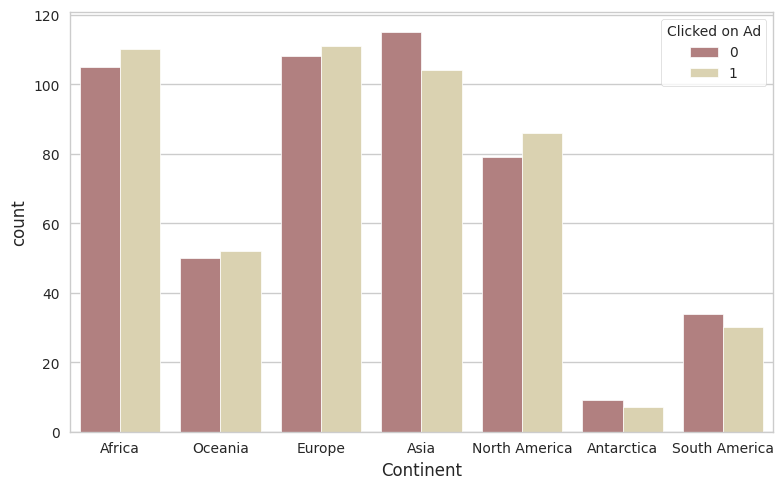

In [202]:
f,ax=plt.subplots(1,1,figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Continent', hue='Clicked on Ad', data=df, palette='pink',ax=ax)
plt.tight_layout()
plt.show()

⬇ **gender**

In [203]:
df['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

In [205]:
df.groupby(['Male', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Male,,
0,250,269
1,250,231


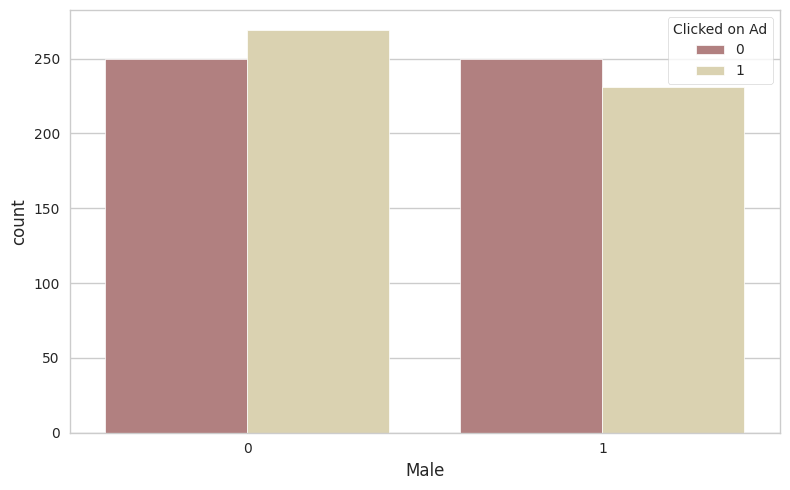

In [206]:
f,ax=plt.subplots(1,1,figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Male', hue='Clicked on Ad', data=df, palette='pink',ax=ax)
plt.tight_layout()
plt.show()

⬇ **Ad Topic Line**

In [207]:
len(np.unique(df['Ad Topic Line']))

1000

In [208]:
 df['Ad Topic Line'].value_counts( ascending = False)

Cloned 5thgeneration orchestration              1
Synchronized multi-tasking ability              1
Customer-focused impactful success              1
Open-source optimizing parallelism              1
Organic logistical adapter                      1
                                               ..
Enhanced zero tolerance Graphic Interface       1
De-engineered tertiary secured line             1
Reverse-engineered well-modulated capability    1
Integrated coherent pricing structure           1
Virtual 5thgeneration emulation                 1
Name: Ad Topic Line, Length: 1000, dtype: int64

In [209]:
coulmn = {
    'Ad Topic Line' : df['Ad Topic Line'],
    'mean_Clicked on Ad' :df['Clicked on Ad']
}

# Create a Dataframe object
df_Topic_Line = pd.DataFrame(coulmn)
df_Topic_Line = df_Topic_Line.groupby(["Ad Topic Line"],as_index=False)[["mean_Clicked on Ad"]].mean()
df_Topic_Line = df_Topic_Line[df_Topic_Line['mean_Clicked on Ad'] >= 0.6]
df_Topic_Line.head(3)

,Ad Topic Line,mean_Clicked on Ad
1,Adaptive asynchronous attitude,1.0
2,Adaptive context-sensitive application,1.0
3,Adaptive contextually-based methodology,1.0


# ⚪ **note**

# There is no correlation between Ad Topic Line and Clicked on Ad

⬇ **Timestamp**

In [210]:
# Converting timestamp column into datatime object in order to extract new features
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Weekday'] = df['Timestamp'].dt.dayofweek

In [211]:
df = df.drop(['Timestamp'], axis=1)
df = df.drop(['City'], axis=1)
df = df.drop(['Ad Topic Line'], axis=1)
df = df.drop(['Day'], axis=1)
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Continent,Month,Hour,Weekday
0,68.95,35,61833.90,256.09,0,Tunisia,0,Africa,3,0,6
1,80.23,31,68441.85,193.77,1,Nauru,0,Oceania,4,1,0
2,69.47,26,59785.94,236.50,0,San Marino,0,Europe,3,20,6


In [212]:
df.groupby(['Month', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Month,,
1,56,57
2,64,57
3,72,71
4,69,57
5,65,65
6,53,62
7,43,42
8,20,15
9,14,20


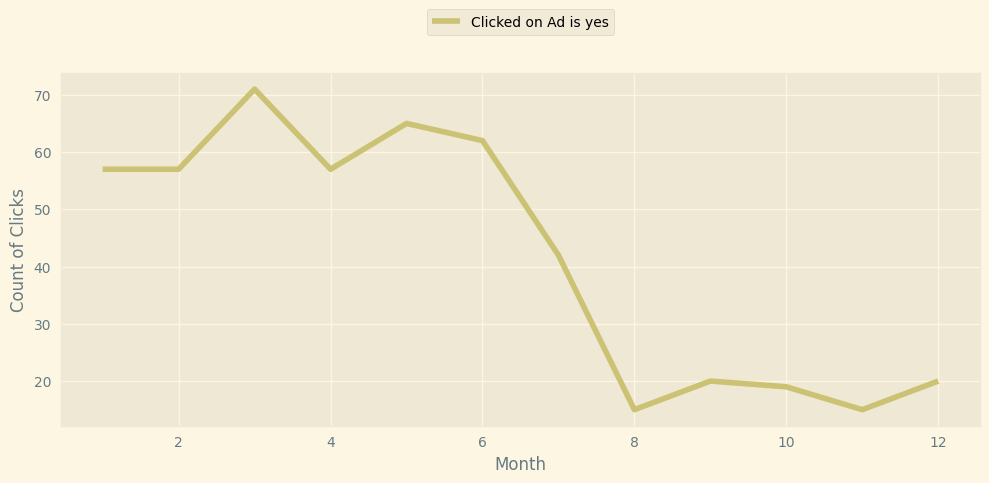

In [213]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Month'][df['Clicked on Ad']==1].value_counts().sort_index(),color="#cbc274",linewidth=4,label="Clicked on Ad is yes")
#ax.set_title('Months Vs Clicks',color="gray")
ax.set_ylabel('Count of Clicks')
ax.set_xlabel('Month')
plt.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center',labelcolor='black')
plt.tight_layout()
plt.show()

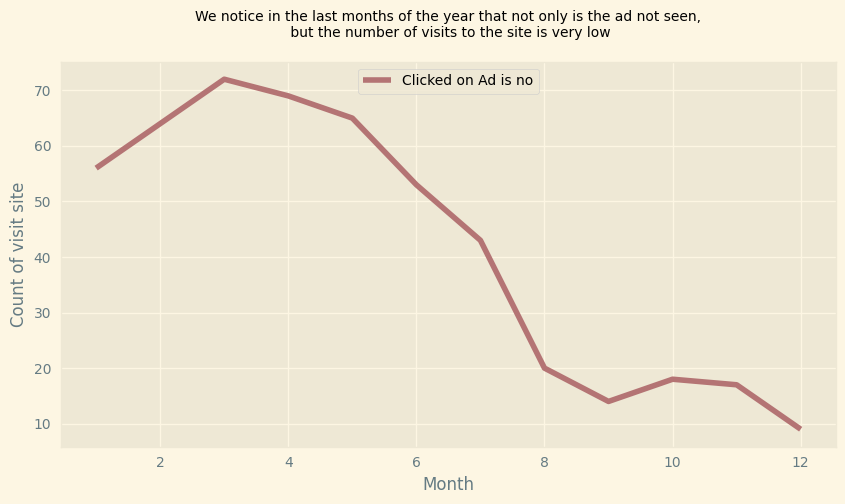

In [214]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Month'][df['Clicked on Ad']==0].value_counts().sort_index(),color = "#b47474",linewidth=4,label="Clicked on Ad is no")
ax.set_title('We notice in the last months of the year that not only is the ad not seen,\n but the number of visits to the site is very low\n',color="black",fontdict ={'fontsize':10})
ax.set_ylabel('Count of visit site')
ax.set_xlabel('Month')
plt.legend(loc='upper center',labelcolor='black')
plt.show()

In [215]:
df.groupby(['Weekday', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Weekday,,
0,68,82
1,59,66
2,76,76
3,64,66
4,74,75
5,68,71
6,91,64


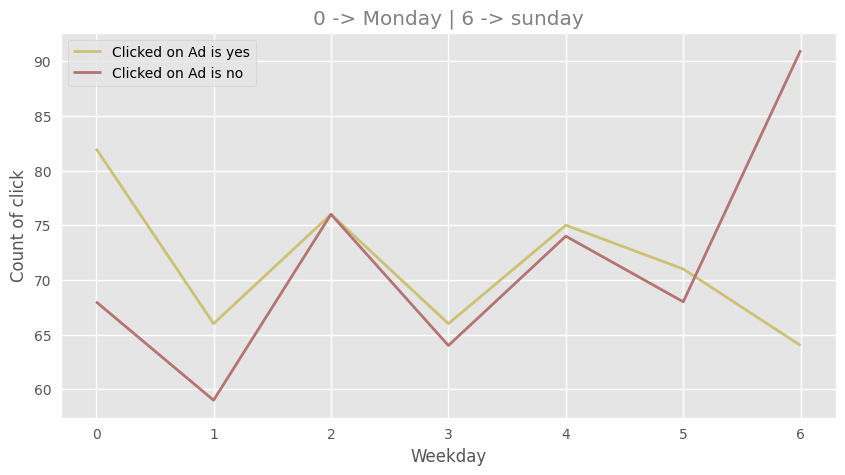

In [216]:
plt.style.use("ggplot")
f,ax=plt.subplots(1,1,figsize=(10,5))
plt.plot(df['Weekday'][df['Clicked on Ad']==1].value_counts().sort_index(), label = "Clicked on Ad is yes" , color = "#cbc274" )
plt.plot(df['Weekday'][df['Clicked on Ad']==0].value_counts().sort_index(), label = "Clicked on Ad is no " ,color = "#b47474")
ax.set_title('0 -> Monday | 6 -> sunday' , color ="gray" )
ax.set_ylabel('Count of click')
ax.set_xlabel('Weekday')
plt.legend(labelcolor='black')
plt.show()

In [217]:
df.groupby(['Hour', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Hour,,
0,19,26
1,16,16
2,19,17
3,19,23
4,21,21
5,23,21
6,16,23
7,28,26
8,22,21


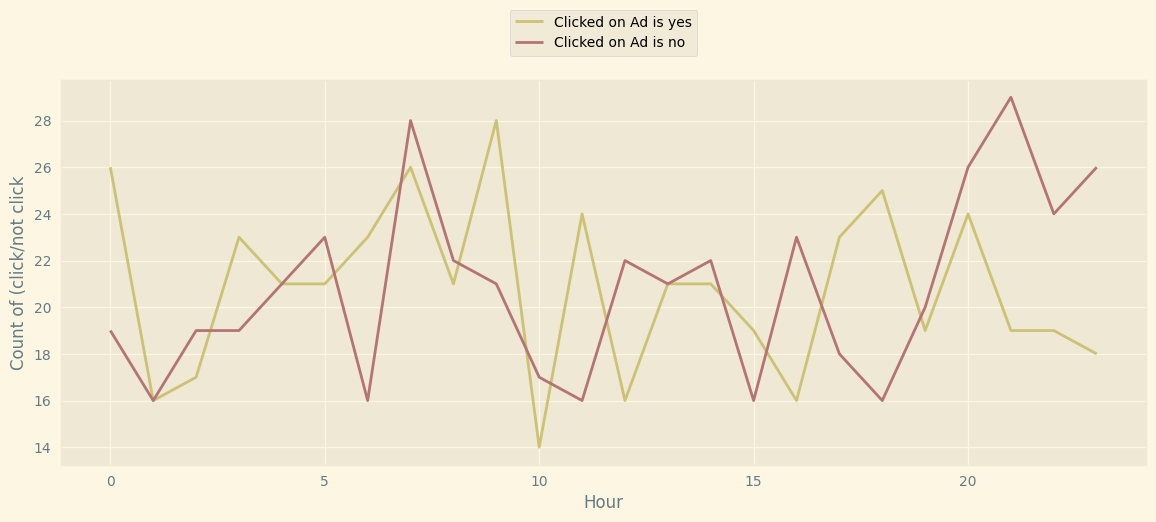

In [218]:
plt.style.use("Solarize_Light2")
f,ax=plt.subplots(1,1,figsize=(14,5))
#df['Hour'][df['Clicked on Ad']==1].value_counts().sort_index().plot(ax=ax)
plt.plot(df['Hour'][df['Clicked on Ad']==1].value_counts().sort_index(), label = "Clicked on Ad is yes" , color = "#cbc274")
plt.plot(df['Hour'][df['Clicked on Ad']==0].value_counts().sort_index(), label = "Clicked on Ad is no " ,color = "#b47474")
#df['Hour'][df['Clicked on Ad']==0].value_counts().sort_index().plot(ax=ax)
ax.set_title('   ')
ax.set_ylabel('Count of (click/not click')
ax.set_xlabel('Hour')
plt.legend(bbox_to_anchor=(0.5, 1.2),loc='upper center',labelcolor='black')
plt.show()

In [219]:
# Define bin edges
bins = [-1, 6, 12, 18, 23]  # Define bins as desired

# Define labels for each bin
labels = ['Night', 'Morning', 'Afternoon', 'Evening']  # Define labels for bins

# Binning hours into categorical bins
df['Hour_bin'] = pd.cut(df['Hour'], bins=bins, labels=labels)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad,Continent,Month,Hour,Weekday,Hour_bin
0,68.95,35,61833.90,256.09,0,Tunisia,0,Africa,3,0,6,Night
1,80.23,31,68441.85,193.77,1,Nauru,0,Oceania,4,1,0,Night
2,69.47,26,59785.94,236.50,0,San Marino,0,Europe,3,20,6,Evening
3,74.15,29,54806.18,245.89,1,Italy,0,Europe,10,2,5,Night
4,68.37,35,73889.99,225.58,0,Iceland,0,Europe,3,3,6,Night


In [220]:
df.groupby(['Hour_bin', 'Clicked on Ad'])['Clicked on Ad'].count().unstack()

Clicked on Ad,0,1
Hour_bin,,
Night,133,147
Morning,126,129
Afternoon,116,125
Evening,125,99


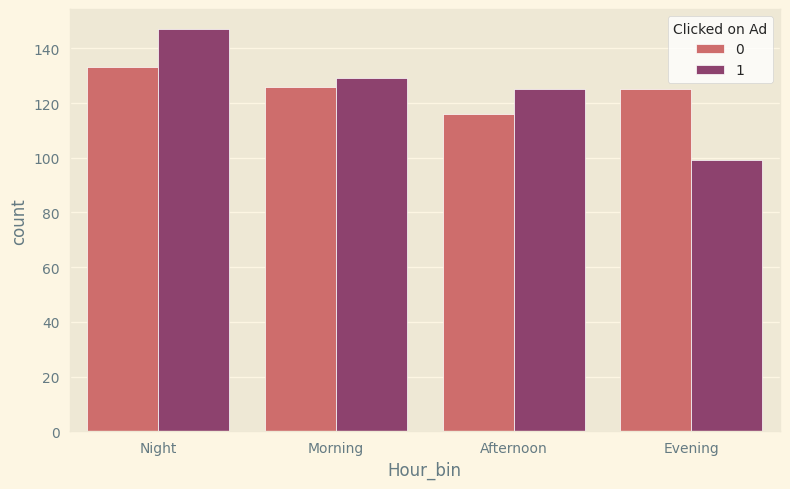

In [221]:
f,ax=plt.subplots(1,1,figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='Hour_bin', hue='Clicked on Ad', data=df, palette="flare",ax=ax)
plt.tight_layout()
plt.show()

# numeric

In [222]:
df[numeric].describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100
std,15.853615,8.785562,13414.634022,43.902339
min,32.600000,19.000000,13996.500000,104.780000
25%,51.360000,29.000000,47031.802500,138.830000
50%,68.215000,35.000000,57012.300000,183.130000
75%,78.547500,42.000000,65470.635000,218.792500
max,91.430000,61.000000,79484.800000,269.960000


<ipython-input-223-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


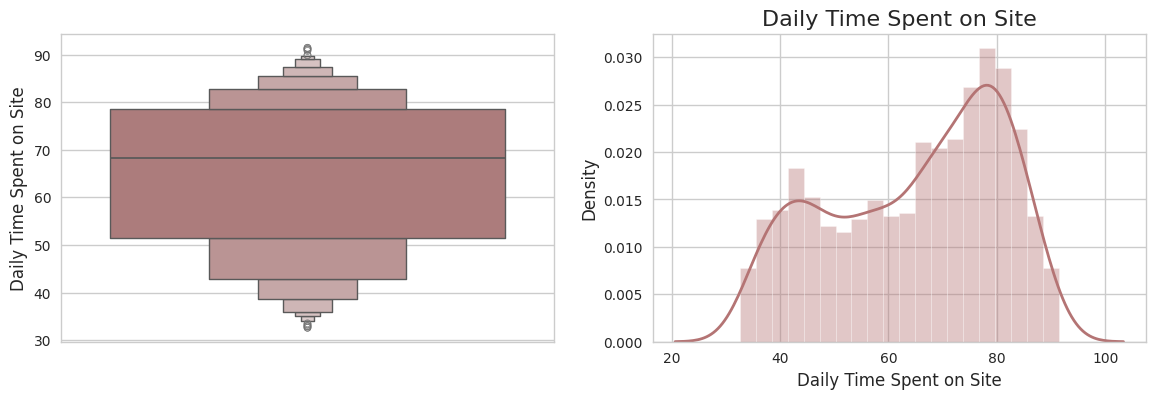

In [223]:
def plots(plot):
    plt.figure(figsize=(14, 6)).set_figheight(4)
    plt.subplot(1,2,1)
    sns.boxenplot(df[plot],color ="#b47474")
    plt.subplot(1,2,2)
    sns.distplot(df[plot], bins=20,color ="#b47474")
    plt.title(plot)
    plt.show()
plots(numeric[0])

<ipython-input-223-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


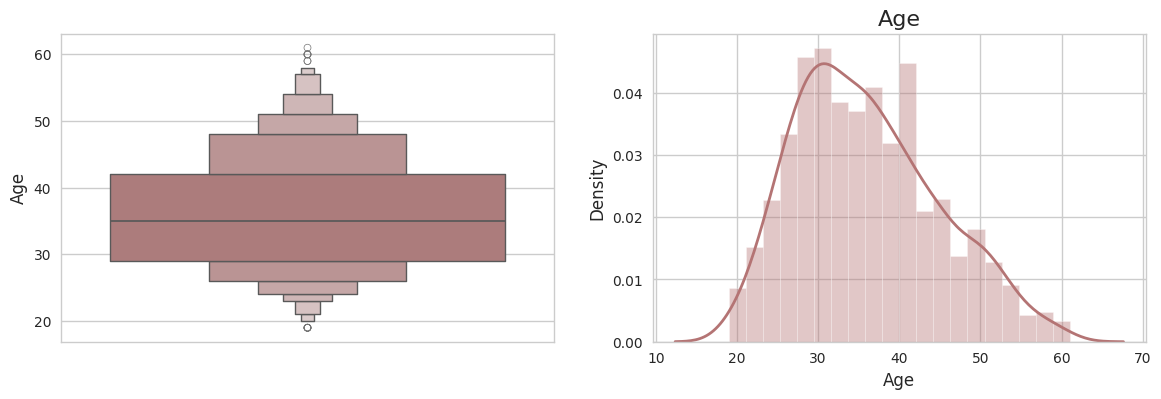

In [224]:
plots(numeric[1])

<ipython-input-223-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


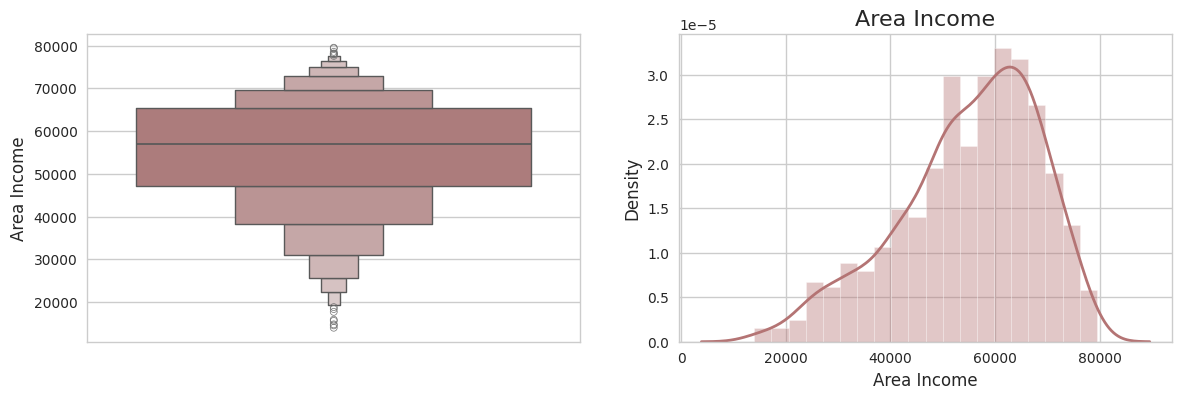

In [225]:
plots(numeric[2])

<ipython-input-223-5da2900d6845>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[plot], bins=20,color ="#b47474")


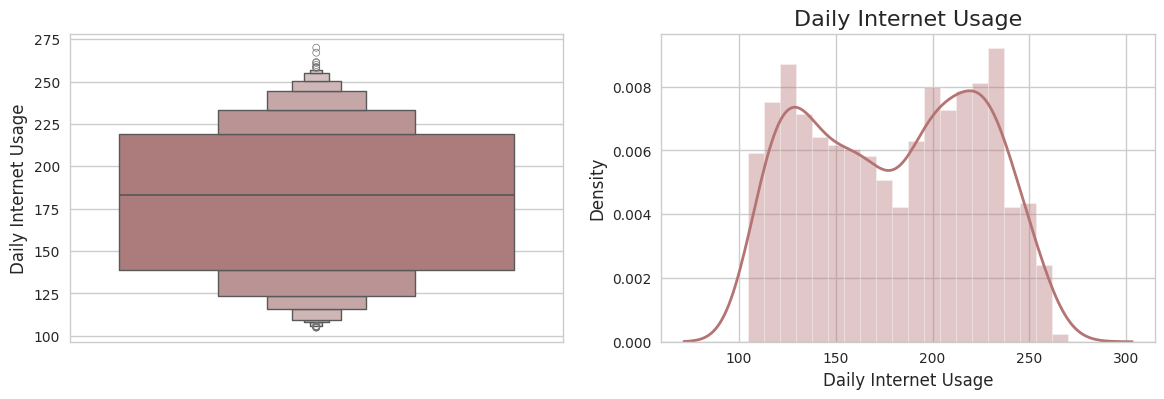

In [226]:
plots(numeric[3])

<ipython-input-227-cebbcec2453e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap=cmap, annot=True)


<Axes: >

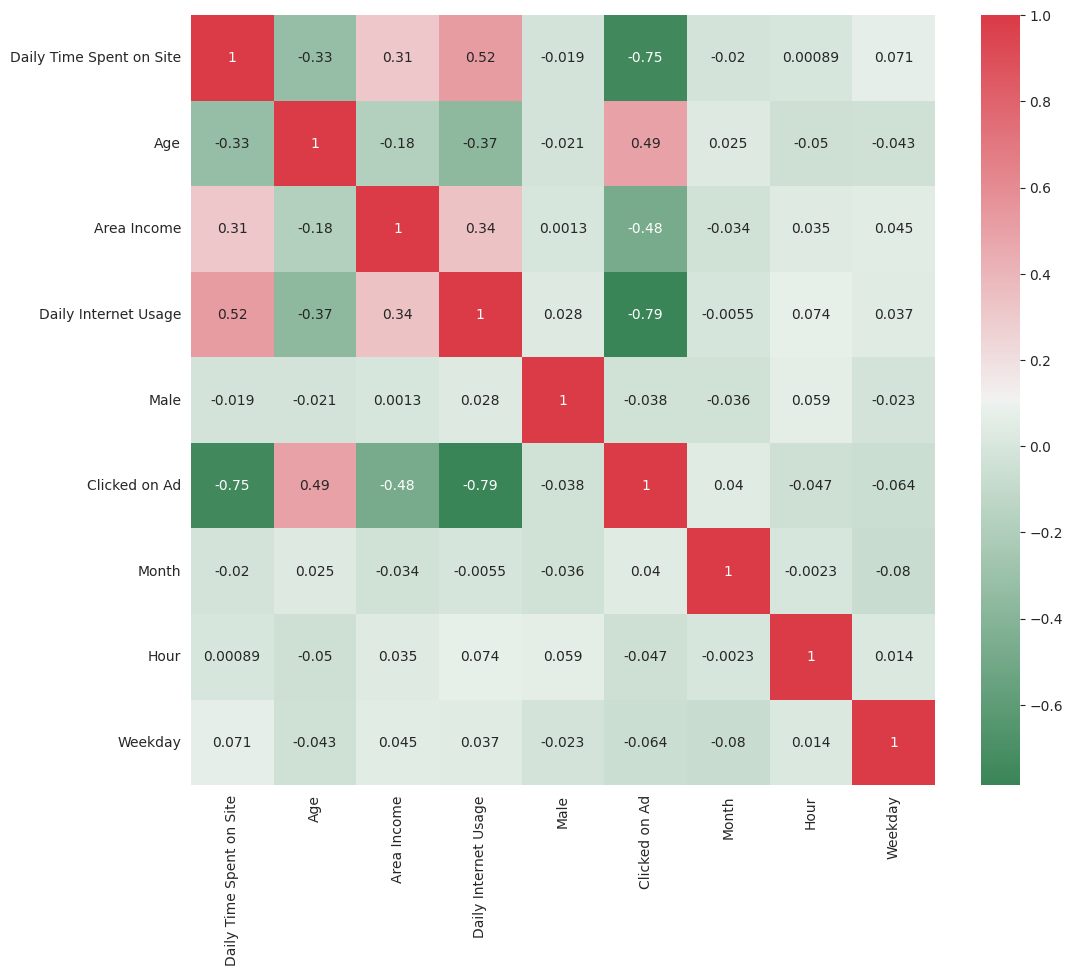

In [227]:
fig = plt.figure(figsize=(12,10))
cmap = sns.diverging_palette(500, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, annot=True)

⬇ **Age**

In [228]:
coulmn = {
    'Age' : df['Age'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Age = pd.DataFrame(coulmn)
df_Age.head(3)

,Age,Clicked_on_Ad
0,35,0
1,31,0
2,26,0


Text(0.5, 1.0, 'Histogram of Age')

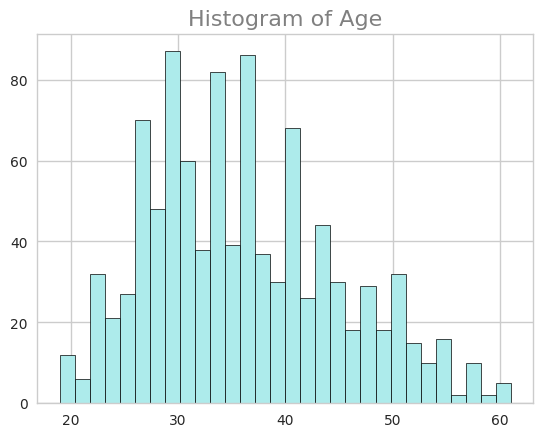

In [229]:
plt.hist(df_Age["Age"], color='#adebeb', ec='black', bins=30)
plt.title ("Histogram of Age" , color = "gray")

In [230]:
print("min =", df_Age.query("Clicked_on_Ad ==0")["Age"].min())
print("max =",df_Age.query("Clicked_on_Ad ==0")["Age"].max())
print("mean =" ,df_Age.query("Clicked_on_Ad ==0")["Age"].mean())
print("median =",df_Age.query("Clicked_on_Ad ==0")["Age"].median())
print("std =",df_Age.query("Clicked_on_Ad ==0")["Age"].std())

min = 19
max = 53
mean = 31.684
median = 31.0
std = 6.212998204843356


In [231]:
print("min =", df_Age.query("Clicked_on_Ad ==1")["Age"].min())
print("max =",df_Age.query("Clicked_on_Ad ==1")["Age"].max())
print("mean =" ,df_Age.query("Clicked_on_Ad ==1")["Age"].mean())
print("median =",df_Age.query("Clicked_on_Ad ==1")["Age"].median())
print("std =",df_Age.query("Clicked_on_Ad ==1")["Age"].std())

min = 19
max = 61
mean = 40.334
median = 40.0
std = 8.85659769015679


⬇ **Area Income**

In [232]:
coulmn = {
    'Area_Income' : df['Area Income'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Area_Income = pd.DataFrame(coulmn)
df_Area_Income.head(3)

,Area_Income,Clicked_on_Ad
0,61833.90,0
1,68441.85,0
2,59785.94,0


Text(0.5, 1.0, 'Histogram of Area_Income')

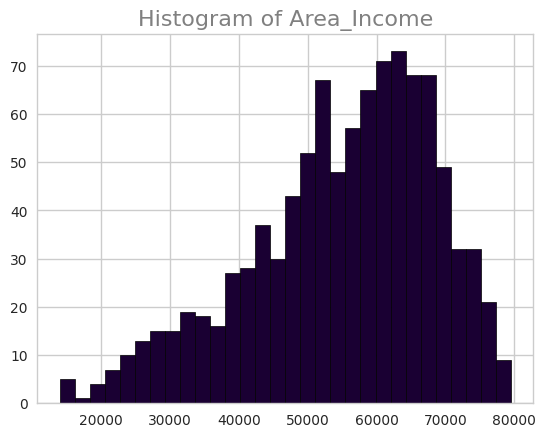

In [233]:
plt.hist(df_Area_Income["Area_Income"], color='#1a0033', ec='black', bins=30)
plt.title ("Histogram of Area_Income" , color = "gray")

In [234]:
print("min =", df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].min())
print("max =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].max())
print("mean =" ,df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].mean())
print("median =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].median())
print("std =",df_Area_Income.query("Clicked_on_Ad ==0")["Area_Income"].std())

min = 33239.2
max = 79484.8
mean = 61385.58642
median = 62275.405
std = 8904.060180193235


In [235]:
print("min =", df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].min())
print("max =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].max())
print("mean =" ,df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].mean())
print("median =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].median())
print("std =",df_Area_Income.query("Clicked_on_Ad ==1")["Area_Income"].std())

min = 13996.5
max = 78520.99
mean = 48614.413739999996
median = 49417.255000000005
std = 14116.24223201224


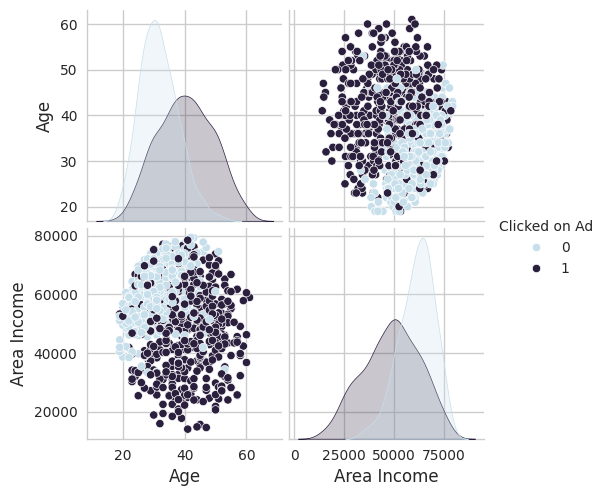

In [236]:
sns.pairplot(df, hue='Clicked on Ad', vars=["Age","Area Income"], palette='ch:s=.25,rot=-.25')

⬇ **Daily Internet Usage**

In [237]:
coulmn = {
    'Daily_Internet_Usage' : df['Daily Internet Usage'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Daily_Internet_Usage = pd.DataFrame(coulmn)
df_Daily_Internet_Usage.head(3)

,Daily_Internet_Usage,Clicked_on_Ad
0,256.09,0
1,193.77,0
2,236.50,0


Text(0.5, 1.0, 'Histogram of Daily Internet Usage')

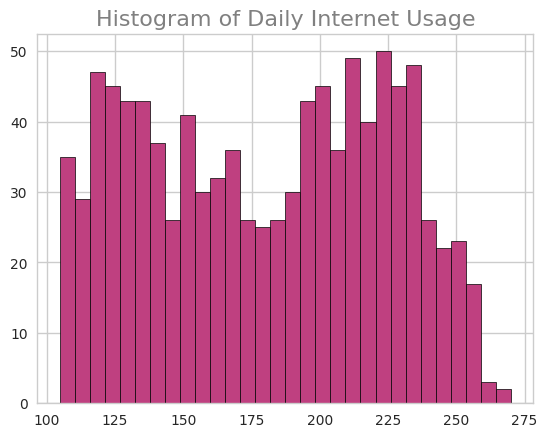

In [238]:
plt.hist(df_Daily_Internet_Usage["Daily_Internet_Usage"], color='#bf4080', ec='black', bins=30)
plt.title ("Histogram of Daily Internet Usage" , color = "gray")

In [239]:
print("min =", df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].min())
print("max =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].max())
print("mean =" ,df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].mean())
print("median =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].median())
print("std =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==0")["Daily_Internet_Usage"].std())

min = 146.19
max = 267.01
mean = 214.51373999999998
median = 216.365
std = 23.8743820789503


In [240]:
print("min =", df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].min())
print("max =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].max())
print("mean =" ,df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].mean())
print("median =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].median())
print("std =",df_Daily_Internet_Usage.query("Clicked_on_Ad ==1")["Daily_Internet_Usage"].std())

min = 104.78
max = 269.96
mean = 145.48646000000002
median = 138.79000000000002
std = 30.025825925583245


In [241]:
coulmn = {
    'Daily_Time_Spent_on_Site' : df['Daily Time Spent on Site'],
    'Clicked_on_Ad' :df['Clicked on Ad']
}
# Create a Dataframe object
df_Daily_Time_Spent_on_Site = pd.DataFrame(coulmn)
df_Daily_Time_Spent_on_Site.head(3)

,Daily_Time_Spent_on_Site,Clicked_on_Ad
0,68.95,0
1,80.23,0
2,69.47,0


Text(0.5, 1.0, 'Histogram of Daily Time Spent on Site')

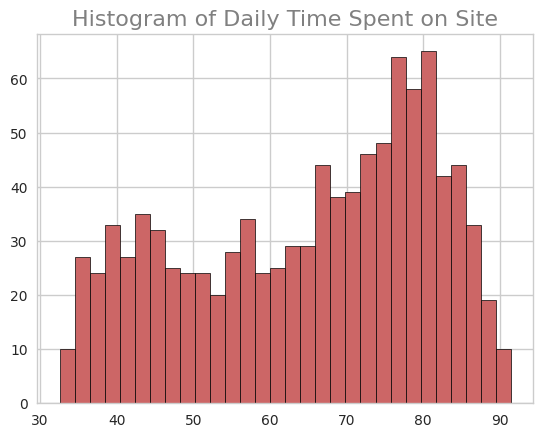

In [242]:
plt.hist(df_Daily_Time_Spent_on_Site["Daily_Time_Spent_on_Site"], color='#cc6666', ec='black', bins=30)
plt.title ("Histogram of Daily Time Spent on Site" , color = "gray")

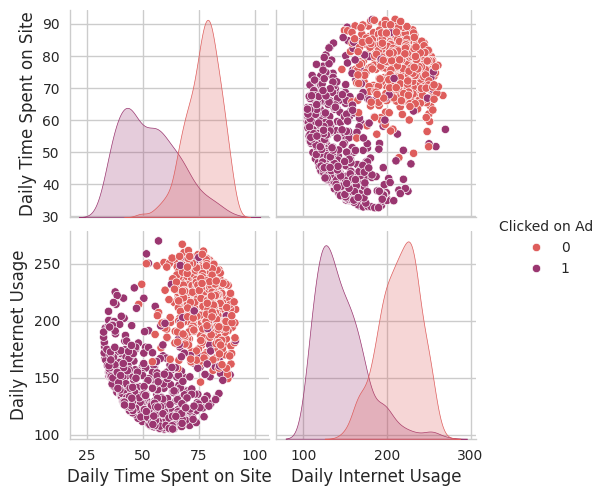

In [243]:
sns.pairplot(df, hue='Clicked on Ad', vars=["Daily Time Spent on Site","Daily Internet Usage"], palette="flare")

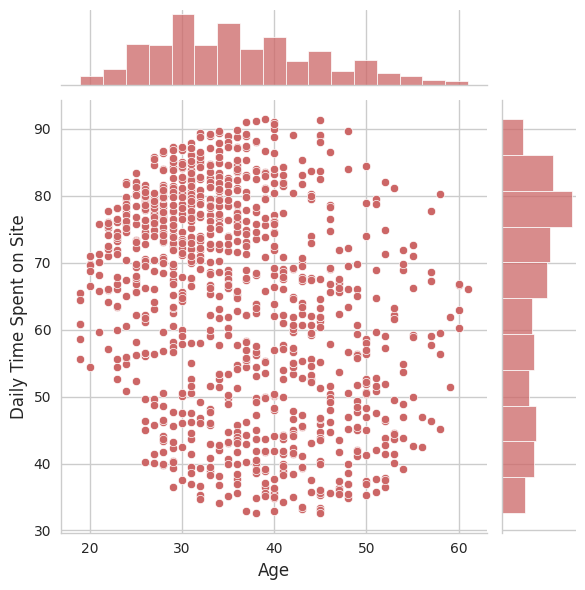

In [244]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df, color = '#cc6666')

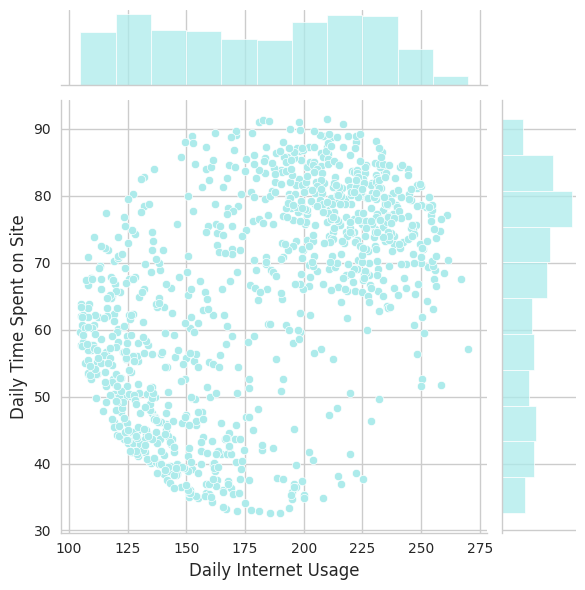

In [245]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=df, color = "#adebeb")

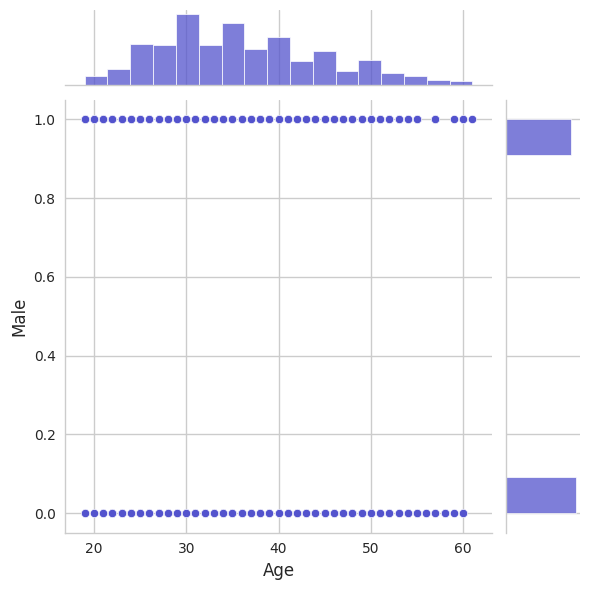

In [246]:
sns.jointplot(x='Age', y='Male', data=df, color = '#5353cd')

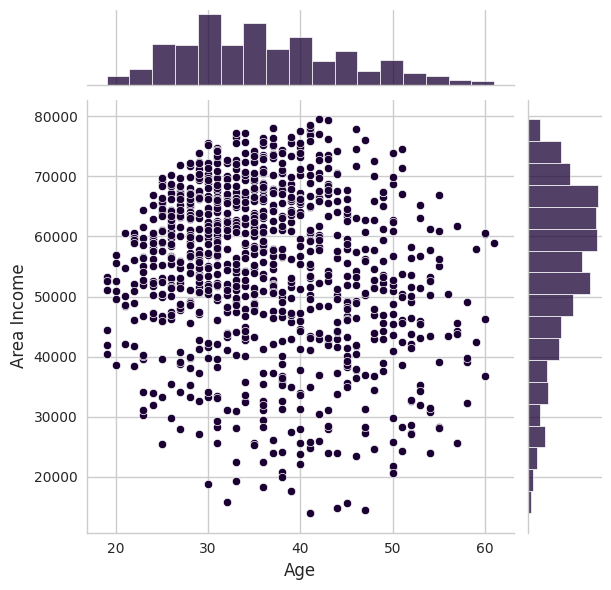

In [247]:
sns.jointplot(x='Age', y='Area Income', data=df, color = '#1a0033')

# Results:

there no miss value

there no dublicate row

there are 1000 rows (information) , 10 features

### **drop** :

*   drop **Ad Topic Line** because : There is no correlation between Ad Topic
    Line and Clicked on Ad where number of the Ad Topic Line becuse = number of the rows
*   drop **city** because : number of country is big if it was a little,i would
    have taken it into consideration
*   drop **Timestamp** where i replaced it with a column for months,days,and
    hours

=> 10 features

### **category**

Male , country , Time(Month,days,hours),clicked on Ad

* gender : There is no gender bias in data where number of male almost equal to
           number of female

   gender with  Clicked on Ad

     male{0: 250,1: 231} , female{0: 250,1: 269}

*   country : number of country is 237
              The maximum number of people accessing the website from a country is **9** .
              But the number of countries where the number of people entering the site > 5 and viewing ads > 0.5 is 50 .
             where : LI{num:6,mean:1} ,ETT{num:7,mean:1} ,
             TR,AU{num:8,mean:0.87},
             HU,UT{num:6,mean:0.83},
             AG,CU{num:5,mean:0.80},
             ZA,LR{num:8,mean:0.75},
*  Time :

   1.   Month :
        month 1 -> 6 number of people entered the site is great where month 3 got the largest number
        month 6 -> 8 The numbers begin to decrease gradually
        month 8 -> 12 Almost fade away
    - Regarding the goal, whether the ad was viewed or not, there is little
      correlation with the months. There is no distinct month in which the ad was always viewed.
      Rather, viewing the advertisement or not every month is similar
   2.   Days :
        On **Sunday**, the number of people entering the site is **large**, but the number of people who see the advertisement is **small**
        On **Monday**, the number of people entering the site is **large** and the number of people viewing the advertisement is **large**
   3.   hours :
        There is almost no correlation with the target


*  clicked on Ad :

   Our data is not biased towards any category, as approximately 50% of the data (Clicked on Ad) is 1 and 50% of the data  (Clicked on Ad) is 0.


### **Numeric**

Daily Time Spent on Site, Age, Area Income, Daily Internet Usage

*     Age :

      Most of the ages were between 30 and 40

      when Ages was 45 to 60 have never seen the ad

==> There is a strong positive correlation between it and target

*     Area Income:

      Most of the Income were between 49000 and 65000

      its skewd to the right

      when Income was 50000 to 80000 The majority didn't see an advertisement

      when Income was 20000 to 50000 The majority saw an advertisement

==> There is a strong negative correlation between it and target

*     Daily Internet Usage:

       Most of the Daily Internet Usage were between 135 and 215

       when Daily Internet Usage was 200 to 300 The majority didn't see an advertisement
       
       when Daily Internet Usage was 100 to 170 The majority saw an advertisement

==> There is a very strong negative correlation between it and target

*      Daily Time Spent on Site :

       Most of the Daily Internet Usage were between 50 and 80

       when Daily Time Spent on Site was 65 to 90 have never seen the ad

==> There is a very strong negative correlation between it and target

#and finally

1. There is a negative correlation between age and  Daily Internet Usage /Daily
   Time Spent on Site
2. There is a positive correlation between Area Income and Daily
   Internet Usage /Daily Time Spent on Site
3. There is a strong positive correlation between Daily
   Internet Usage /Daily Time Spent on Site

# **Ads Problem**
We have the Target and the features -> Supervised

We need to classify the person whether they will watch the ad or not -> classfication


# **Dealing with the missing values**

The data does not contain miss values

# **Dealing with the categorical Data**

**column country**

**column Continent**

**column month**

**column weekday**

**column hourse**

**column male**

In [248]:
pip install category_encoders

In [249]:
import category_encoders as ce
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Continent'], prefix='Continent')
df_encoded.drop(columns=['Country','Hour_bin'],inplace=True,axis=1)
df_encoded.head()
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
 6   Month                     1000 non-null   int64  
 7   Hour                      1000 non-null   int64  
 8   Weekday                   1000 non-null   int64  
 9   Continent_Africa          1000 non-null   uint8  
 10  Continent_Antarctica      1000 non-null   uint8  
 11  Continent_Asia            1000 non-null   uint8  
 12  Continent_Europe          1000 non-null   uint8  
 13  Continent_North America   1000 non-null   uint8  
 14  Continent

# **Scaling Data**

In [250]:
from sklearn.model_selection import train_test_split

# Splitting the DataFrame into training and test sets
train_df, test_df = train_test_split(df_encoded, test_size=0.2, random_state=42)

In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  800 non-null    float64
 1   Age                       800 non-null    int64  
 2   Area Income               800 non-null    float64
 3   Daily Internet Usage      800 non-null    float64
 4   Male                      800 non-null    int64  
 5   Clicked on Ad             800 non-null    int64  
 6   Month                     800 non-null    int64  
 7   Hour                      800 non-null    int64  
 8   Weekday                   800 non-null    int64  
 9   Continent_Africa          800 non-null    uint8  
 10  Continent_Antarctica      800 non-null    uint8  
 11  Continent_Asia            800 non-null    uint8  
 12  Continent_Europe          800 non-null    uint8  
 13  Continent_North America   800 non-null    uint8  
 14  Continent

<ipython-input-252-1c9b1a7c6f66>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Clicked on Ad', data=train_df,palette="flare")


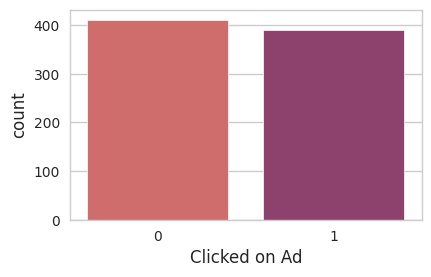

In [252]:
#To verify that the train data is not biased toward a specific class
plt.figure(figsize=(10, 6))
plt.subplot(2,2,1)
sns.countplot(x='Clicked on Ad', data=train_df,palette="flare")
plt.show()

note: Since the target is 0 and 1, its value will not change when we scale the data, so there is no need to separate it.

In [253]:
# Scaler -> min max scaler
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Columns to scale
scale_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# Fit the scaler on the training data and transform both training and test data.
scaler.fit(train_df[scale_cols])

train_df[scale_cols] = scaler.transform(train_df[scale_cols])
test_df[scale_cols] = scaler.transform(test_df[scale_cols])
train_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Hour,Weekday,Continent_Africa,Continent_Antarctica,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
29,0.738059,0.071429,0.491438,0.669606,0,0,1,12,2,0,1,0,0,0,0,0
535,0.784634,0.309524,0.855364,0.658103,1,0,4,10,2,0,0,0,0,0,0,1
695,0.695054,0.452381,0.811381,0.889507,0,0,2,11,6,0,0,0,0,0,1,0
557,0.800102,0.214286,0.680726,0.778055,0,0,7,1,2,1,0,0,0,0,0,0
836,0.282339,0.642857,0.537652,0.067485,0,1,2,3,6,0,0,0,0,1,0,0


# **Build model**

In [254]:
X_train = train_df.drop('Clicked on Ad',axis=1)
y_train = train_df['Clicked on Ad']

X_test = test_df.drop('Clicked on Ad',axis=1)
y_test = test_df['Clicked on Ad']

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [256]:
logistic_model = LogisticRegression()
svc_model = SVC()
decision_tree_model = DecisionTreeClassifier()
knn_model = KNeighborsClassifier()
naive_bayes_model = GaussianNB()


In [257]:
logistic_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
naive_bayes_model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GaussianNB()

In [258]:
y_pred_logistic = logistic_model.predict(X_test)
y_pred_svc = svc_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)


In [259]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)

# Print the confusion matrices
print('logistic accuracy:', accuracy_score(y_pred_logistic, y_test))
print('')
print("Confusion Matrix for Logistic Regression:")
print(confusion_matrix_logistic)
print('')
print('svc accuracy:', accuracy_score(y_pred_svc, y_test))
print('')
print("\nConfusion Matrix for Support Vector Classifier:")
print(confusion_matrix_svc)
print('')
print('decision tree accuracy:', accuracy_score(y_pred_decision_tree, y_test))
print('')
print("\nConfusion Matrix for Decision Tree Classifier:")
print(confusion_matrix_decision_tree)
print('')
print('KNN Classifier accuracy:', accuracy_score(y_pred_knn, y_test))
print('')
print("\nConfusion Matrix for KNN Classifier:")
print(confusion_matrix_knn)
print('')
print('naive bayes accuracy:', accuracy_score(y_pred_naive_bayes, y_test))
print('')
print("\nConfusion Matrix for Naive Bayes:")
print(confusion_matrix_naive_bayes)

logistic accuracy: 0.93

Confusion Matrix for Logistic Regression:
[[87  2]
 [12 99]]

svc accuracy: 0.865


Confusion Matrix for Support Vector Classifier:
[[88  1]
 [26 85]]

decision tree accuracy: 0.905


Confusion Matrix for Decision Tree Classifier:
[[ 78  11]
 [  8 103]]

KNN Classifier accuracy: 0.615


Confusion Matrix for KNN Classifier:
[[58 31]
 [46 65]]

naive bayes accuracy: 0.945


Confusion Matrix for Naive Bayes:
[[ 84   5]
 [  6 105]]


# **Light GPM**

In [260]:
# Training a LightGBM Classifier
import lightgbm as lgb

# Initialize LightGBM classifier
clf = lgb.LGBMClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
print("\n")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_matrix_lightgbm = confusion_matrix(y_test, y_pred)
print("confusion_matrix_lightgbm:")
print(confusion_matrix_lightgbm)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 389, number of negative: 411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 864
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486250 -> initscore=-0.055014
[LightGBM] [Info] Start training from score -0.055014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

Save model naive_bayes , make it API

```
# This is formatted as code
```



Extract feature :  Continent from country , [month, day, hour] from Timestamp

 Drop :  Ad Topic Line	, City , country ,Timestamp

Encoding -> [continent] : onehotencoding


 Scaling ->  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'] -> min max


In [261]:
columns_to_drop = ['Ad Topic Line', 'City' , 'country' ,'Timestamp']

# Numerical columns to impute and scale
numerical_cols =  ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']
# Columns to one-hot encode
onehot_encode_cols = ['Continent']

In [266]:
import pandas as pd
import pycountry_convert
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split


# Custom Transformer to Drop Columns
def drop_columns(X, columns):
    return X.drop(columns=columns)

# Define the columns to be dropped
columns_to_drop = ['Ad Topic Line', 'City', 'Country', 'Timestamp']

# Create a FunctionTransformer with the drop_columns function
#drop_columns_transformer = FunctionTransformer(drop_columns, kw_args={'columns': columns_to_drop})

# Define the function to get continent from country

country_to_continent = {
    'Palestinian Territory': 'Asia',  # Assuming it's referring to the Palestinian territories
    'British Indian Ocean Territory (Chagos Archipelago)': 'Africa',  # This territory is part of Africa
    'Korea': 'Europe',  # Assuming it's referring to South Korea, which is in Asia; for North Korea, it's also in Asia
    'Bouvet Island (Bouvetoya)': 'Antarctica',  # Bouvet Island is an uninhabited island in the South Atlantic Ocean, part of Antarctica
    'Saint Helena': 'Africa',  # Saint Helena is an island in the Atlantic Ocean, part of Africa
    "Cote d'Ivoire": 'Africa',  # Also known as Ivory Coast, located in Africa
    'Timor-Leste': 'Asia',  # Timor-Leste (East Timor) is in Southeast Asia
    'Antarctica': 'Antarctica',  # Antarctica is a continent
    'Western Sahara': 'Africa',  # Western Sahara is a disputed territory in North Africa
    'United States Minor Outlying Islands': 'North America',  # These are small islands owned by the United States scattered around the world
    'Holy See (Vatican City State)': 'Europe',  # Vatican City is in Europe
    'French Southern Territories': 'Antarctica',  # These territories are part of Antarctica
    'Pitcairn Islands': 'Oceania',  # Pitcairn Islands are in the Pacific Ocean, part of Oceania
    'Libyan Arab Jamahiriya': 'Africa',  # Former name for Libya, located in North Africa
    'Saint Barthelemy': 'North America',  # Saint Barthelemy is a Caribbean island, part of North America
    'Reunion': 'Africa',  # Reunion Island is in the Indian Ocean, part of Africa
    'Netherlands Antilles': 'North America',  # Former autonomous Caribbean country, part of North America
    'Slovakia (Slovak Republic)': 'Europe'  # Slovakia is in Central Europe
}
def get_continent(country_name):
    try:
        country_alpha_2 = pycountry_convert.country_name_to_country_alpha2(country_name)
        continent_code = pycountry_convert.country_alpha2_to_continent_code(country_alpha_2)
        continent_name = pycountry_convert.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except LookupError:
        return country_to_continent[country_name]


# Define the feature extraction function
def extract_features(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Month'] = df['Timestamp'].dt.month
    df['Day'] = df['Timestamp'].dt.dayofweek
    df['Hour'] = df['Timestamp'].dt.hour
    df['Continent'] = df['Country'].apply(get_continent)  # You need to define get_continent function
    return df


df = pd.read_csv("/content/advertising1.csv")

# Create the pipeline components
numerical_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

onehot_encode_transformer = Pipeline(steps=[
    ('onehot_encoder', OneHotEncoder())
])

# Assemble the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('drop_columns', 'drop', columns_to_drop),
        ('num', numerical_transformer, numerical_cols),
        ('onehot_encode', onehot_encode_transformer, onehot_encode_cols)
    ],
    remainder='passthrough'
)

# Create the complete pipeline with SVC model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('naive_bayes', GaussianNB())])

# Apply the pipeline
X = df.drop(columns=['Clicked on Ad'])
y = df['Clicked on Ad']

X_processed = extract_features(X)


X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion_matrix_naive_bayes = confusion_matrix(y_test, y_pred)
print("confusion_matrix naive bayes:")
print(confusion_matrix_naive_bayes)




Accuracy: 0.945
confusion_matrix naive bayes:
[[ 84   5]
 [  6 105]]


In [267]:
import joblib

# Save the model to a file
joblib.dump(pipeline, 'Clicked on ad_pipeline.pkl')

['Clicked on ad_pipeline.pkl']